In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import regex as rg

# Part1: Baby Weights

In [14]:
bmx = pd.read_sas("BMX_I.XPT")
demo = pd.read_sas("DEMO_I.XPT")
data = bmx.merge(right = demo, on = 'SEQN')
dat = data.loc[data['RIDAGEMN'].isnull() == False].copy()
dat.loc[:, 'RIDAGEMN'] = dat.loc[:, 'RIDAGEMN'].astype(int)

In [20]:
baby = dat.loc[:, ['RIAGENDR', 'BMXWT', 'RIDAGEMN']]
baby = baby.loc[baby['RIDAGEMN'] < 13]
baby_boy = baby.loc[baby['RIAGENDR'] == 1.0]
baby_boy_mean = baby_boy.groupby('RIDAGEMN')['BMXWT'].mean()
print(baby_boy_mean)

RIDAGEMN
0      4.794444
1      5.791667
2      6.661111
3      7.000000
4      7.795000
5      8.525000
6      8.263636
7      9.061111
8      9.322222
9     10.093750
10    10.364286
11     9.963636
12    10.523077
Name: BMXWT, dtype: float64


In [21]:
baby_girl = baby[baby['RIAGENDR'] == 2.0]
baby_girl_mean = baby_girl.groupby('RIDAGEMN')['BMXWT'].mean()
print(baby_girl_mean)

RIDAGEMN
0     4.508333
1     5.457143
2     5.712500
3     6.553846
4     7.052941
5     7.647059
6     8.005263
7     8.190909
8     8.303704
9     9.243750
10    9.066667
11    9.100000
12    9.757143
Name: BMXWT, dtype: float64


In [22]:
wt_diff = baby_boy_mean - baby_girl_mean
print(wt_diff)

RIDAGEMN
0     0.286111
1     0.334524
2     0.948611
3     0.446154
4     0.742059
5     0.877941
6     0.258373
7     0.870202
8     1.018519
9     0.850000
10    1.297619
11    0.863636
12    0.765934
Name: BMXWT, dtype: float64


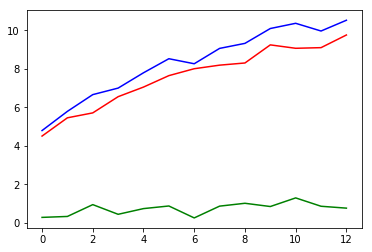

In [24]:
plt.plot(np.arange(13), baby_boy_mean, color = "b")
plt.plot(np.arange(13), baby_girl_mean, color = "r")
plt.plot(np.arange(13), wt_diff, color = "g")
plt.show()

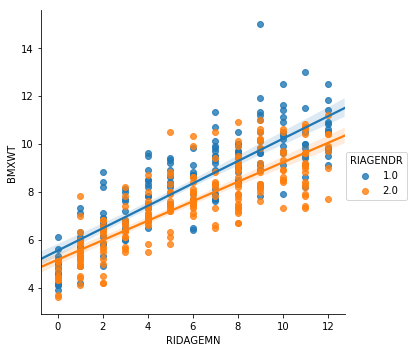

In [28]:
sns.lmplot(x="RIDAGEMN", y="BMXWT", hue = "RIAGENDR", data=baby)

I think that age and weight are postive relationship for both genders. Also, boys are little bit more heavier than girls as getting older. 

In [29]:
dependent_ttest_results = scipy.stats.ttest_rel(baby_boy_mean, baby_girl_mean)
print(dependent_ttest_results)

Ttest_relResult(statistic=8.43897149898669, pvalue=2.167037580112345e-06)


As the result above, the weight difference is significant.

# Part2: Height vs leg length vs arm length:

In [69]:
adult = data[data['RIDAGEYR'] >= 20]
adult = adult[['RIDAGEYR', 'BMXARML', 'BMXLEG', 'BMXHT']]
adult = adult[['RIDAGEYR', 'BMXARML', 'BMXLEG', 'BMXHT']].dropna(how = 'any')
adult.shape

(5086, 4)

In [70]:
# What is the correlation between standing height and upper leg length?
adult.loc[:, 'BMXHT'].corr(adult.loc[:, 'BMXLEG'])

0.7874491670325251

In [71]:
# What is the correlation between standing height and upper arm length?
adult.loc[:, 'BMXHT'].corr(adult.loc[:, 'BMXARML'])

0.7978726822536467

In [72]:
# What is the correlation between upper leg length and upper arm length?
adult.loc[:, 'BMXLEG'].corr(adult.loc[:, 'BMXARML'])

0.6293694196844937

In [73]:
adult['range'] = pd.cut(adult.RIDAGEYR, [20, 30, 40, 50, 60, 70, 80, 90], right=False)

In [74]:
adult.groupby('range')['BMXHT', 'BMXLEG', 'BMXARML'].mean()

,BMXHT,BMXLEG,BMXARML
range,,,
"[20, 30)",167.879617,40.064189,37.068919
"[30, 40)",167.488202,39.556128,37.154754
"[40, 50)",166.563244,38.680863,37.094632
"[50, 60)",166.351476,38.163400,37.188784
"[60, 70)",164.977480,37.342707,37.252859
"[70, 80)",164.728016,36.984049,37.350102
"[80, 90)",162.097091,36.516000,36.908000


In [75]:
adult['adjusted height'] = adult['BMXHT'] - 128
print(adult['adjusted height'].head())

0    56.5
1    43.4
2    42.1
3    32.9
4    36.9
Name: adjusted height, dtype: float64


In [76]:
adj_ht_mean = adult.groupby('range')['adjusted height'].mean()
leg_mean = adult.groupby('range')['BMXLEG'].mean()
arm_mean = adult.groupby('range')['BMXARML'].mean()
print(adj_ht_mean)

range
[20, 30)    39.879617
[30, 40)    39.488202
[40, 50)    38.563244
[50, 60)    38.351476
[60, 70)    36.977480
[70, 80)    36.728016
[80, 90)    34.097091
Name: adjusted height, dtype: float64


In [77]:
print(leg_mean)

range
[20, 30)    40.064189
[30, 40)    39.556128
[40, 50)    38.680863
[50, 60)    38.163400
[60, 70)    37.342707
[70, 80)    36.984049
[80, 90)    36.516000
Name: BMXLEG, dtype: float64


In [78]:
print(arm_mean)

range
[20, 30)    37.068919
[30, 40)    37.154754
[40, 50)    37.094632
[50, 60)    37.188784
[60, 70)    37.252859
[70, 80)    37.350102
[80, 90)    36.908000
Name: BMXARML, dtype: float64


In [80]:
a = str(adult.range.cat.categories[0:7])
age_range = rg.findall(pattern=r'\[\d+\, \d+\)', string = a)

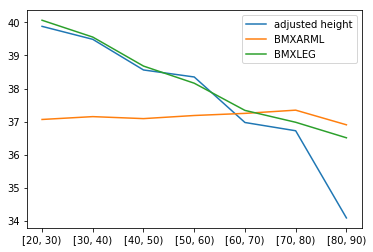

In [81]:
plt.plot(age_range, adj_ht_mean)
plt.plot(age_range, arm_mean)
plt.plot(age_range, leg_mean)
plt.legend()
plt.show()

Height, legs length, and arms length are highly positively correlated with each other.
Height and length of legs are shrinking as getting older. On the other hand, arm length is not affected by age. 
According to the plot, the length of legs are not shrinking as long as height. I would say that there is other facts to affect height.

In [85]:
dat3 = data[['INDHHIN2', 'DMDHREDU', 'RIDAGEYR']]
dat3 = dat3[dat3['RIDAGEYR'] >= 20]
dat3 = dat3[['INDHHIN2', 'DMDHREDU']].dropna(how = 'any')
dat3 = dat3[(dat3['INDHHIN2'] != 99) & (dat3['INDHHIN2'] != 77)]
dat3 = dat3[(dat3['DMDHREDU'] != 7) & (dat3['DMDHREDU'] != 9)]
dat3 = dat3[(dat3['INDHHIN2'] != 12) & (dat3['INDHHIN2'] != 13)]
dat3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 0 to 9543
Data columns (total 2 columns):
INDHHIN2    4720 non-null float64
DMDHREDU    4720 non-null float64
dtypes: float64(2)
memory usage: 110.6 KB


In [86]:
print(dat3.shape)

(4720, 2)


In [87]:
dat3.describe()

,INDHHIN2,DMDHREDU
count,4720.000000,4720.000000
mean,8.464619,3.496610
std,4.406695,1.285479
min,1.000000,1.000000
25%,5.000000,3.000000
50%,7.000000,4.000000
75%,14.000000,5.000000
max,15.000000,5.000000


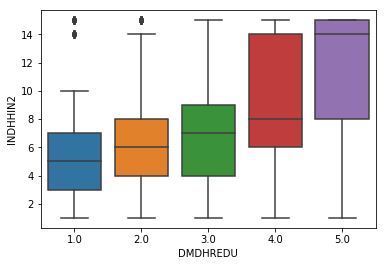

In [88]:
sns.boxplot(x = 'DMDHREDU', y = 'INDHHIN2', data = dat3)

According to the boxplot, highly educated people who have a college diploma or more, make more money than other groups significantly. But, except the highly educated group which are 4, and 5, they earn money within standard deviation.
But, the highly educated group tend to earn moneny much more than the other groups. Therefore, the Education level of the head of the household related to household income significantly.

In [95]:
group_one = dat3[dat3['DMDHREDU'] == 1].INDHHIN2
group_two = dat3[dat3['DMDHREDU'] == 2].INDHHIN2
group_three = dat3[dat3['DMDHREDU'] == 3].INDHHIN2
group_four = dat3[dat3['DMDHREDU'] == 4].INDHHIN2
group_five = dat3[dat3['DMDHREDU'] == 5].INDHHIN2

print(scipy.stats.f_oneway(group_one, group_two, group_three, group_four, group_five))

F_onewayResult(statistic=279.7641862189763, pvalue=4.1076025293507744e-216)


According to One-way ANOVA, we can see that the education level is related to household income significantly.